In [117]:
import pandas as pd
import tensorflow as tf
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [118]:
df = pd.read_csv('TeslaInc. ( TSLA ).csv')
df.Date=pd.to_datetime(df.Date, infer_datetime_format=True)
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500


In [119]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

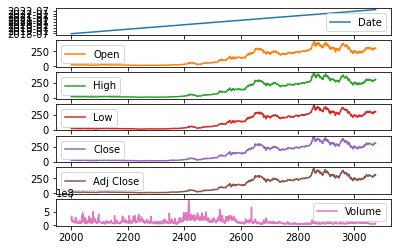

In [120]:
df.iloc[2000:].plot(subplots=True)

<AxesSubplot:>

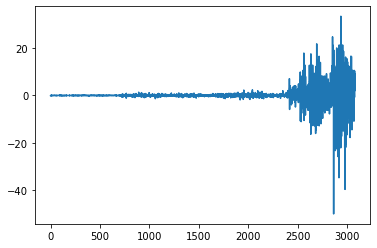

In [121]:
(df.Close-df.Open).plot()

In [122]:
#here Edi will find out what features to consider for maximum efficiency.
list_of_features=['Open','Close','Adj Close', 'Volume']
preprocessor = make_column_transformer((StandardScaler(), list_of_features))

In [123]:
frac=0.59
dff=df.copy().set_index('Date')
df_train= dff.iloc[:int(frac*df.shape[0]),:]
df_val = dff.drop(df_train.index,axis=0)
X_train = df_train[list_of_features]
X_val = df_val[list_of_features]
y_train = df_train.drop(X_train,axis=1)
y_val = df_val.drop(X_val,axis=1)
X_train= preprocessor.fit_transform(X_train)
X_val= preprocessor.fit_transform(X_val)
y_train= y_train / y_train.max()
y_val= y_val/ y_val.max()

In [149]:
#based on open and close, let's predict what are the min and max for a given day :)
model= tf.keras.models.Sequential([
    layers.Dense(59,activation='relu',input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(35, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(17, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [150]:
model.compile(optimizer='adam',loss=tf.keras.losses.MAE)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),batch_size=28,epochs=355,callbacks=[tf.keras.callbacks.EarlyStopping(patience=80, min_delta=0.01, restore_best_weights=True)])

Epoch 1/355
65/65 [==============================] - 1s 4ms/step - loss: 0.3877 - val_loss: 0.3954
Epoch 2/355
65/65 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.4414
Epoch 3/355
65/65 [==============================] - 0s 2ms/step - loss: 0.1166 - val_loss: 0.4317
Epoch 4/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0894 - val_loss: 0.3882
Epoch 5/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0773 - val_loss: 0.3016
Epoch 6/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0736 - val_loss: 0.1917
Epoch 7/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.1739
Epoch 8/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0664 - val_loss: 0.1173
Epoch 9/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.1093
Epoch 10/355
65/65 [==============================] - 0s 2ms/step - loss: 0.0660 - val_loss: 0.1101
Epoch 11/

<AxesSubplot:>

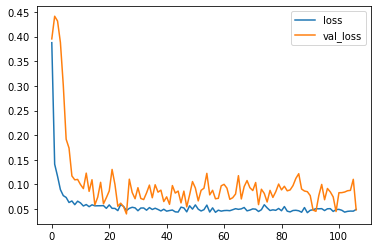

In [151]:

df_hist= pd.DataFrame(history.history)
df_hist.loc[:, ['loss', 'val_loss']].plot()